<Figure size 1200x600 with 0 Axes>

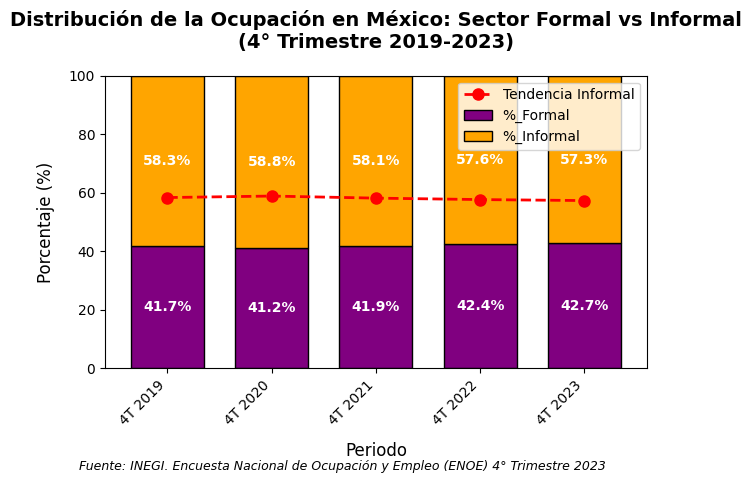


Datos de Ocupación (Millones de personas):
Trimestre  Ocupados_Formal  Ocupados_Informal  %_Formal  %_Informal
  4T 2019             22.1               30.9 41.698113   58.301887
  4T 2020             20.8               29.7 41.188119   58.811881
  4T 2021             22.5               31.2 41.899441   58.100559
  4T 2022             23.4               31.8 42.391304   57.608696
  4T 2023             24.1               32.3 42.730496   57.269504


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos oficiales del INEGI (Trimestre Oct-Dic 2023 - últimos disponibles)
data = {
    'Trimestre': ['4T 2019', '4T 2020', '4T 2021', '4T 2022', '4T 2023'],
    'Ocupados_Formal': [22.1, 20.8, 22.5, 23.4, 24.1],
    'Ocupados_Informal': [30.9, 29.7, 31.2, 31.8, 32.3]
}

df = pd.DataFrame(data)

# Calcular porcentajes
total_ocupados = df['Ocupados_Formal'] + df['Ocupados_Informal']
df['%_Formal'] = (df['Ocupados_Formal'] / total_ocupados) * 100
df['%_Informal'] = (df['Ocupados_Informal'] / total_ocupados) * 100

# Crear figura
plt.figure(figsize=(12, 6))

# Gráfica de barras }
ax = df.plot.bar(x='Trimestre', y=['%_Formal', '%_Informal'],
                 stacked=True, color=['#800080', '#FFA500'],  # Morado y Naranja
                 edgecolor='black', width=0.7)

# Personalización
plt.title('Distribución de la Ocupación en México: Sector Formal vs Informal\n(4° Trimestre 2019-2023)',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Periodo', fontsize=12, labelpad=10)
plt.ylabel('Porcentaje (%)', fontsize=12, labelpad=10)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

# Etiquetas de valor en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2),
                ha='center', va='center', color='white', fontweight='bold')

# Línea de tendencia para informalidad roja
df['Tendencia_Informal'] = df['%_Informal']
plt.plot(df.index, df['Tendencia_Informal'], marker='o',
         color='red', linestyle='--', linewidth=2, markersize=8,
         label='Tendencia Informal')

# Leyenda y fuente
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.figtext(0.5, 0.01,
            "Fuente: INEGI. Encuesta Nacional de Ocupación y Empleo (ENOE) 4° Trimestre 2023",
            ha="center", fontsize=9, style='italic')

plt.tight_layout()
plt.show()

# Mostrando tabla con datos
print("\nDatos de Ocupación (Millones de personas):")
print(df[['Trimestre', 'Ocupados_Formal', 'Ocupados_Informal', '%_Formal', '%_Informal']].to_string(index=False))
